# **Machine Learning - Logistic Regression** # 



# Preparation


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Dataset

In [ ]:
import cv2
import os 
import numpy as np

# extract zip file
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/ML Coursework/COP508_Sea_Animal_dataset.zip', 'r') as zipObj:
  zipObj.extractall('/content/')

sea_animals = '/content/COP508_Sea_Animal_dataset'

class_names = ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster', 'Nudibranchs',
              'Octopus', 'Puffers', 'Sea Rays', 'Seahorse', 'Seal', 'Sharks', 'Squid', 'Starfish',
               'Whale']
X = []
y = []

# iterarate through dataset
for names_index, names in enumerate(class_names):
  for images in os.listdir(os.path.join(sea_animals, names)):
    image_path = os.path.join(sea_animals, names, images)
    # read images and save into list
    img = cv2.imread(image_path)
    # resize images so all equal
    img = cv2.resize(img, (80, 80))
    X.append(img) 
    y.append(names_index)

# X contains images
X = np.asarray(X)
# y contains labels
y = np.asarray(y)


Exploring Dataset

This training set contains 16 classes, as listed below

In [ ]:
os.listdir(sea_animals)

['Seahorse',
 'Starfish',
 'Jelly Fish',
 'Seal',
 'Lobster',
 'Sea Rays',
 'Puffers',
 'Squid',
 'Whale',
 'Corals',
 'Nudibranchs',
 'Sharks',
 'Crabs',
 'Octopus',
 'Eel',
 'Dolphin']

These are the names of all images within the, 'Eel,' class

In [ ]:
os.listdir(os.path.join(sea_animals, 'Eel'))

['32102807772_c5a92a0d5b_b.jpg',
 '15815461754_e0478e56be_o.jpg',
 '233118790_49a34c3ce0_o.jpg',
 '14118782981_6330f43049_b.jpg',
 '3605359334_d3e8b3943d_b.jpg',
 '4155234224_2c5530c11e_o.jpg',
 '3832169097_dd24bb1e14_o.jpg',
 '7776217078_7eaefc1a0c_b.jpg',
 '8155197556_ed7840a037_o.jpg',
 '7946873882_3348b90680_o.jpg',
 '5169235140_5f112dcdff_o.jpg',
 '2798479217_7a0cabfd94_b.jpg',
 '11560314403_c623953e68_o.jpg',
 '43266545031_68db35808e_b.jpg',
 '9971081013_a7e1f041da_o.jpg',
 '4244783227_715250a24d_o.jpg',
 '6245807589_7d863d80dd_o.jpg',
 '5322296456_8b2b566fc1_o.jpg',
 '13170307045_a6c776c632_o.jpg',
 '1354021192_c759d528ef_o.jpg',
 '33122782253_c7f70954cb_b.jpg',
 '15095858658_4344a7fe11_b.jpg',
 '33629151704_a0c90aa4a7_b.jpg',
 '266694447_b7b1ecdffb_o.jpg',
 '14463974261_c74ede430c_o.jpg',
 '8173854608_f36d5fdec3_o.jpg',
 '21458573411_35dc264bcf_b.jpg',
 '2431678639_60c20b7de7_o.jpg',
 '5602738024_813b2dde37_b.jpg',
 '29625028414_19b08ae1f9_b.jpg',
 '26633590373_97c8db26ab_o.jpg

Classes, with amount of images within each class

In [ ]:
sea_animals_data = {}
sea_animals_classes = sorted(os.listdir(sea_animals))
for name in sea_animals_classes:
    sea_animals_data[name] = len(os.listdir(sea_animals + f'/{name}'))
print(sea_animals_data)

{'Corals': 500, 'Crabs': 499, 'Dolphin': 782, 'Eel': 497, 'Jelly Fish': 855, 'Lobster': 499, 'Nudibranchs': 500, 'Octopus': 562, 'Puffers': 531, 'Sea Rays': 517, 'Seahorse': 478, 'Seal': 414, 'Sharks': 590, 'Squid': 483, 'Starfish': 499, 'Whale': 572}


X contains 8778 images, with image size of 80x80 pixels, and 3 channels

y contains 8778 labels relevant to the images

In [ ]:
print(X.shape)
print(y.shape)

(8778, 80, 80, 3)
(8778,)


Dataset is divided into a 70/20 training, testing split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

X_train contains 7022 images, with image size of 80x80 pixels, and 3 channels

X_test contains 1756 images, with image size of 80x80 pixels, and 3 channels

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7022, 80, 80, 3)
(1756, 80, 80, 3)


In [ ]:
print('X_train:', X_train)
print('X_test', X_test)

X_train: [[[[171 113   1]
   [169 118   4]
   [171 106   0]
   ...
   [205 176 101]
   [206 177 101]
   [207 177 100]]

  [[160 118  22]
   [177 120   5]
   [167 118   7]
   ...
   [204 178 106]
   [199 174 101]
   [205 179 105]]

  [[238 209 152]
   [152 102   0]
   [200 161  82]
   ...
   [205 174  93]
   [201 170  89]
   [207 175  96]]

  ...

  [[173 116   0]
   [173 117   0]
   [174 117   1]
   ...
   [154 105   6]
   [163 110   3]
   [174 117   3]]

  [[175 119   0]
   [176 120   1]
   [176 120   1]
   ...
   [173 115   6]
   [177 119   4]
   [181 121   1]]

  [[176 121   0]
   [177 122   1]
   [177 122   1]
   ...
   [182 119   1]
   [183 122   2]
   [182 121   0]]]


 [[[165 144 122]
   [168 147 125]
   [156 135 113]
   ...
   [140 113  86]
   [138 111  84]
   [136 109  82]]

  [[134 113  91]
   [114  93  71]
   [118  97  75]
   ...
   [138 111  84]
   [140 113  86]
   [135 108  81]]

  [[143 122 100]
   [129 108  86]
   [134 113  91]
   ...
   [137 110  83]
   [135 108  81]
  

Labels 

In [ ]:
print('Labels in y:', np.bincount(y))
print('Labels in y_train:', np.bincount(y_train))
print('Labels in y_test:', np.bincount(y_test))
print('y_train:', y_train)
print('y_test', y_test)

Labels in y: [500 499 782 497 855 499 500 562 531 517 478 414 590 483 499 572]
Labels in y_train: [400 399 625 398 684 399 400 450 425 414 382 331 472 386 399 458]
Labels in y_test: [100 100 157  99 171 100 100 112 106 103  96  83 118  97 100 114]
y_train: [ 2 15  9 ...  5  5  3]
y_test [14  4 11 ...  1  3 12]


Plotting an image from dataset

(-0.5, 79.5, 79.5, -0.5)

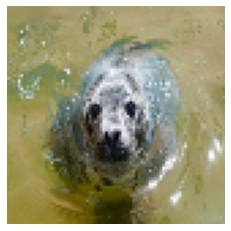

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train.reshape(7022, 80, 80, 3)[5])
plt.axis('off')

Third image in the training set is a Starfish

In [ ]:
class_names[y_test[3]]

'Starfish'

Plotting the first 20 images from the training set

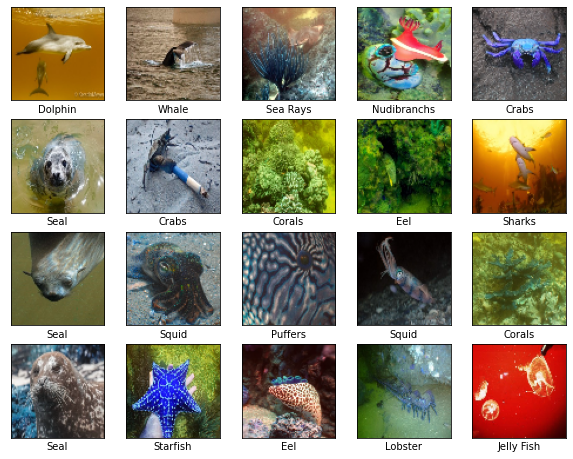

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train.reshape(7022, 80, 80, 3)[i], cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()

X_train before standardisation

In [ ]:
X_train

array([[[[171, 113,   1],
         [169, 118,   4],
         [171, 106,   0],
         ...,
         [205, 176, 101],
         [206, 177, 101],
         [207, 177, 100]],

        [[160, 118,  22],
         [177, 120,   5],
         [167, 118,   7],
         ...,
         [204, 178, 106],
         [199, 174, 101],
         [205, 179, 105]],

        [[238, 209, 152],
         [152, 102,   0],
         [200, 161,  82],
         ...,
         [205, 174,  93],
         [201, 170,  89],
         [207, 175,  96]],

        ...,

        [[173, 116,   0],
         [173, 117,   0],
         [174, 117,   1],
         ...,
         [154, 105,   6],
         [163, 110,   3],
         [174, 117,   3]],

        [[175, 119,   0],
         [176, 120,   1],
         [176, 120,   1],
         ...,
         [173, 115,   6],
         [177, 119,   4],
         [181, 121,   1]],

        [[176, 121,   0],
         [177, 122,   1],
         [177, 122,   1],
         ...,
         [182, 119,   1],
        

Standardisation

In [ ]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
#X_val = (X_val - X_mean) / X_std

X_train after standardisation

In [ ]:
X_train

array([[[[ 8.84793425e-01,  3.31359155e-01, -9.17064972e-01],
         [ 8.28209651e-01,  3.86364992e-01, -8.76457354e-01],
         [ 8.38964728e-01,  1.85244818e-01, -9.38171264e-01],
         ...,
         [ 1.29979034e+00,  1.27138395e+00,  6.49207284e-01],
         [ 1.33081031e+00,  1.30399308e+00,  6.56881434e-01],
         [ 1.36441521e+00,  1.32050500e+00,  6.46430969e-01]],

        [[ 7.26667154e-01,  4.03409890e-01, -5.89304628e-01],
         [ 9.36029225e-01,  4.11372755e-01, -8.64701188e-01],
         [ 7.79782596e-01,  3.61364454e-01, -8.34737144e-01],
         ...,
         [ 1.28949900e+00,  1.30559472e+00,  7.27896045e-01],
         [ 1.23174458e+00,  1.25074498e+00,  6.51572036e-01],
         [ 1.33120612e+00,  1.34619341e+00,  7.20694648e-01]],

        [[ 1.79229667e+00,  1.80585344e+00,  1.45900384e+00],
         [ 5.91983361e-01,  1.30356176e-01, -9.44647111e-01],
         [ 1.23086089e+00,  1.02319411e+00,  3.28884958e-01],
         ...,
         [ 1.30113012e+0

Plotting images after standardisation

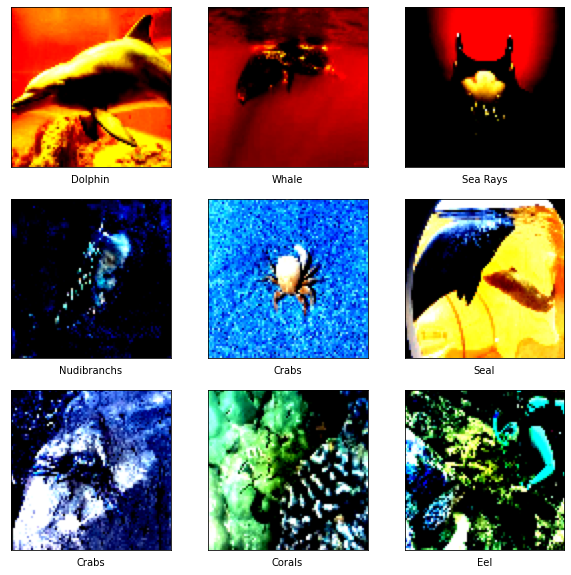

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train.reshape(7022, 80, 80, 3)[i], cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()

X_train and X_test are of 3 dimensions

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7022, 80, 80, 3)
(1756, 80, 80, 3)


X_train and X_test are flattened into 2 dimensions to fit traditional ML models

In [ ]:
X_train = X_train.reshape(7022, 80*80*3)
X_test = X_test.reshape(1756, 80*80*3)

X_train and X_test after flattening

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7022, 19200)
(1756, 19200)


# Logistic Regression

Logistic Regression lbfgs, multinomial 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_multinomial = LogisticRegression(C=10, random_state=1, 
                        solver='lbfgs', multi_class='multinomial', max_iter=3000, penalty='l2')


lr_multinomial.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=3000, multi_class='multinomial',
                   random_state=1)

Logistic Regression lbfgs, multinomial training set accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap

# accuracy on training set
y_pred_lr_multinomial_train = lr_multinomial.predict(X_train)
print('Misclassified examples: %d' % (y_train != y_pred_lr_multinomial_train).sum())
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred_lr_multinomial_train))
print('Accuracy: %.3f' % lr_multinomial.score(X_train, y_train))

Misclassified examples: 19
Accuracy: 0.997
Accuracy: 0.997


Logistic Regression lbfgs, multinomial test set accuracy

In [ ]:
# accuracy on test set
y_pred_lr_multinomial_test = lr_multinomial.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_lr_multinomial_test).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lr_multinomial_test))

Misclassified examples: 1367
Accuracy: 0.222


Logistic Regression lbfgs, multinomial  evaluation

In [ ]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test.tolist(), y_pred_lr_multinomial_test.tolist(), average='weighted'))
print(recall_score(y_test.tolist(), y_pred_lr_multinomial_test.tolist(), average='weighted'))
print(f1_score(y_test.tolist(), y_pred_lr_multinomial_test.tolist(), average='weighted'))
print(accuracy_score(y_test.tolist(), y_pred_lr_multinomial_test.tolist()))


0.2186457120894576
0.2215261958997722
0.21724457699804434
0.2215261958997722


Logistic Regression lbfgs, multinomial confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr_multinomial = confusion_matrix(y_test, y_pred_lr_multinomial_test)
print(cm_lr_multinomial)

[[ 8  7  6  4  5  9  2  8  5 14  7  7  4  9  2  3]
 [ 6 39  2  2  4  4  8  4  7  0  4  2  3  4 10  1]
 [ 0  3 56  2  7  2  0  2  5 15  2 11 19  7  2 24]
 [ 2  4  4 13  3  9  7  6  7  3  5  8 10  6  5  7]
 [ 4  6  8  4 76  0  5  2  7  6  6  4 16  7  7 13]
 [ 2  8  4 15  4 11  5 10  9  7  4  4  3  6  5  3]
 [ 3  8  1  9  4  8 13  5  7  7  7  6  3  3 12  4]
 [ 5  2  7  9  4  7  7 13  7  8  7  4  8  8 10  6]
 [ 7  1  9  8  4  4  6  5 10 11  5 10  6 11  4  5]
 [ 1  1 14  4  3  2  2  2  7 18  4 11 13  6  1 14]
 [ 4  8  7  3 12  4  4  3  9  3 13  3  7  8  2  6]
 [ 2  2 18  1  8  2  1  1  1  7  1 19  8  4  1  7]
 [ 0  4 12  4 12  3  1  4  6 11  1  8 19 10  0 23]
 [ 2  2  6  5 11  5  4  6  7 10 10  5  5 12  1  6]
 [ 3 10  2  1  7  6  3  8  5  7  3  9  1  1 32  2]
 [ 0  2 24  1  7  1  0  1  2 10  1  1 22  3  2 37]]


Logistic Regression lbfgs, multinomial classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_multinomial_test))

              precision    recall  f1-score   support

           0       0.16      0.08      0.11       100
           1       0.36      0.39      0.38       100
           2       0.31      0.36      0.33       157
           3       0.15      0.13      0.14        99
           4       0.44      0.44      0.44       171
           5       0.14      0.11      0.12       100
           6       0.19      0.13      0.15       100
           7       0.16      0.12      0.14       112
           8       0.10      0.09      0.10       106
           9       0.13      0.17      0.15       103
          10       0.16      0.14      0.15        96
          11       0.17      0.23      0.19        83
          12       0.13      0.16      0.14       118
          13       0.11      0.12      0.12        97
          14       0.33      0.32      0.33       100
          15       0.23      0.32      0.27       114

    accuracy                           0.22      1756
   macro avg       0.21   

Logistic Regression lbfgs, multinomial, balanced


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_multinomial_balanced = LogisticRegression(C=10, random_state=1, 
                        solver='lbfgs', multi_class='multinomial', max_iter=1000, class_weight='balanced')


lr_multinomial_balanced.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=1)

Logistic Regression lbfgs, multinomial, balanced training accuracy

In [ ]:
#training set accuracy: X_train
y_pred_lr_multinomial_balanced_train = lr_multinomial_balanced.predict(X_train)
print('Misclassified examples: %d' % (y_train != y_pred_lr_multinomial_balanced_train).sum())
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred_lr_multinomial_balanced_train))
print('Accuracy: %.3f' % lr_multinomial.score(X_train, y_train))

Misclassified examples: 19
Accuracy: 0.997
Accuracy: 0.997


Logistic Regression lbfgs, multinomial, balanced test accuracy

In [ ]:
# accuracy on test set: X_test
y_pred_lr_multinomial_balanced_test = lr_multinomial_balanced.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_lr_multinomial_balanced_test).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lr_multinomial_balanced_test))
print('Accuracy: %.3f' % lr_multinomial_balanced.score(X_test, y_test))

Misclassified examples: 1378
Accuracy: 0.215
Accuracy: 0.215


Logistic Regression lbfgs, multinomial, balanced confusion matrix

In [ ]:
cm_lr_multinomial_balanced = confusion_matrix(y_test, y_pred_lr_multinomial_balanced_test)
print(cm_lr_multinomial_balanced)

[[12  7  4  4  5  9  1 10  4 14  7  7  4  8  1  3]
 [ 5 38  2  4  3  6  7  5  8  0  4  2  3  4  8  1]
 [ 0  4 50  2  6  2  0  3  4 16  1 13 20  7  3 26]
 [ 2  3  4 12  3  9  8  7  5  2  7  9 10  7  5  6]
 [ 3  5 10  4 75  1  5  3  7  5  5  4 16  8  5 15]
 [ 2  7  3 17  4 10  6 10  9  7  4  4  3  6  5  3]
 [ 3  6  2  9  4  7 15  6  7  6  7  8  3  3 11  3]
 [ 5  3  5  9  3  9  7 13  8  8  6  4  8  8 10  6]
 [ 7  1  8  7  4  4  5  6 11 14  5 10  5  9  5  5]
 [ 2  3 13  3  4  2  3  2  7 16  3 10 14  6  1 14]
 [ 3  8  7  3 11  7  4  3  8  4 12  3  7  7  3  6]
 [ 3  2 19  1  7  2  2  1  1  7  1 17  8  4  1  7]
 [ 0  4 11  5 11  4  1  4  6 11  1  8 20 10  0 22]
 [ 2  2  6  6 11  5  4  5  7 10 10  5  3 12  1  8]
 [ 3 10  3  1  8  6  4  8  7  6  3  9  1  0 29  2]
 [ 0  2 21  1  7  1  0  1  2 10  1  2 25  3  2 36]]


Logistic Regression lbfgs, multinomial, balanced classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_multinomial_balanced_test))

              precision    recall  f1-score   support

           0       0.23      0.12      0.16       100
           1       0.36      0.38      0.37       100
           2       0.30      0.32      0.31       157
           3       0.14      0.12      0.13        99
           4       0.45      0.44      0.45       171
           5       0.12      0.10      0.11       100
           6       0.21      0.15      0.17       100
           7       0.15      0.12      0.13       112
           8       0.11      0.10      0.11       106
           9       0.12      0.16      0.13       103
          10       0.16      0.12      0.14        96
          11       0.15      0.20      0.17        83
          12       0.13      0.17      0.15       118
          13       0.12      0.12      0.12        97
          14       0.32      0.29      0.31       100
          15       0.22      0.32      0.26       114

    accuracy                           0.22      1756
   macro avg       0.20   